In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
def concatenate_csv_files(directory_path):
    all_dataframes = []

    # Walk over all files in the directory
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            # Check if the file is a CSV file
            if file == "all.csv":
                file_path = os.path.join(root, file)
                # Read the CSV file and append to the list of DataFrames
                df = pd.read_csv(file_path)
                all_dataframes.append(df)

    # Check if there are any CSV files found
    if not all_dataframes:
        print("No CSV files found in the directory.")
        return None

    # Concatenate all DataFrames into a single DataFrame
    concatenated_df = pd.concat(all_dataframes, ignore_index=True)
    concatenated_df = concatenated_df.drop_duplicates(subset='java_file', keep='first')

    return concatenated_df

# Specify the directory path where you want to search for CSV files
directory_path = "/home/rmg/cam/data"

# Call the function to concatenate CSV files
result_df = concatenate_csv_files(directory_path)

# Display the result DataFrame

/tmp/ipykernel_2095/3805045715.py:14: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [7]:
df = result_df[result_df['repo'].isna()]

# Display the updated DataFrame
df.shape

(302805, 26)

In [8]:
df.to_csv('result_data.csv', index=False)

In [47]:
df = pd.read_csv("result_data.csv")
df.info()

/tmp/ipykernel_2285/1437627363.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("result_data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302805 entries, 0 to 302804
Data columns (total 26 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   repo       0 non-null       float64
 1   java_file  302805 non-null  object 
 2   acoco      302805 non-null  object 
 3   CAMC       302805 non-null  object 
 4   CAMC-cvc   302805 non-null  object 
 5   cc         302805 non-null  object 
 6   coco       302805 non-null  object 
 7   fout       302805 non-null  int64  
 8   hsd        302805 non-null  float64
 9   hse        302805 non-null  float64
 10  hsv        302805 non-null  float64
 11  java       302805 non-null  object 
 12  LCOM5      302805 non-null  object 
 13  LCOM5-cvc  302805 non-null  object 
 14  loc        302805 non-null  int64  
 15  midx       302805 non-null  float64
 16  MMAC       302805 non-null  object 
 17  MMAC-cvc   302805 non-null  object 
 18  mncoco     302805 non-null  object 
 19  mxcoco     302805 non-n

In [48]:
df.shape

(302805, 26)

In [49]:
df[["java_file", "cc", "nobl", "coco"]].isnull().any().any()

False

In [50]:
def filter_columns(df):
    filtered_df = df.copy()
    for i in df.columns:
        filtered_df = filtered_df[filtered_df[i].notna() & (df[i] != '-')]
        filtered_df.loc[:, i] = filtered_df.loc[:, i].astype(float)
    return filtered_df
    
def plot_scatter(df, xaxis, yaxis):
    filtered_df = df[df[xaxis].notna() & (df[xaxis] != '-') & df[yaxis].notna() & (df[yaxis] != '-')]
    filtered_df.loc[:, xaxis] = filtered_df.loc[:, xaxis].astype(int)
    filtered_df.loc[:, yaxis] = filtered_df.loc[:, yaxis].astype(int)
    print(filtered_df.shape)
    plt.scatter(filtered_df[xaxis], filtered_df[yaxis])
    plt.xlabel(xaxis)  # Label for the x-axis
    plt.ylabel(yaxis)    # Label for the y-axis
    # plt.ylim(ymin=0, ymax=200) 
    plt.title(f"Scatter Plot of {yaxis} vs {xaxis}")
    plt.show()

def count_corr(df, column_list):
    # Filter rows based on conditions for specified columns
    filtered_df = df[df[column_list].notna().all(axis=1) & (df[column_list] != '-').all(axis=1)]
    # Convert the specified columns to float
    filtered_df.loc[:, column_list] = filtered_df.loc[:, column_list].astype(float)
    # Calculate correlation for specific columns
    correlation_matrix = filtered_df[column_list].corr()
    return correlation_matrix

In [51]:
df.sample(n=1)['java_file'].iloc[0]

'/src/main/java/io/mycat/cache/impl/EnchachePool_getMaxSize_5.java'

In [52]:
df.sample(n=1)[['java_file']]
df = df[df["cc"].notna() & (df["cc"] != '-')]
df.loc[:, "cc"] = df.loc[:, "cc"].astype(int)
with open("smth.txt", 'w') as file:
    file.write(df.sample(n=1)['java_file'].iloc[0])
df[(df['loc'] < 40) &(df['nobl'] > 4) & (df['cc'] > 2)].shape

(2921, 26)

(2921, 28)


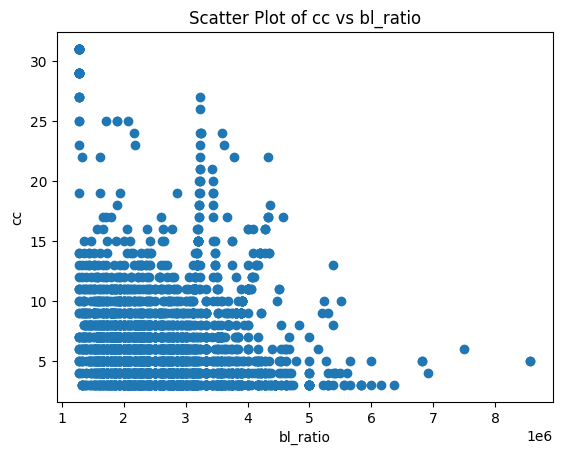

In [55]:
plot_scatter(df[(df['loc'] < 40) &(df['nobl'] > 4) & (df['cc'] > 2)], "bl_ratio", "cc")

In [54]:
df.loc[:, "bl_ratio"] = 10000000 * df["nobl"] / df["loc"]
df["bl_ratio"] = df["bl_ratio"].astype(int)
df.loc[:, "cl_ratio"] = 10000000 * df["nocl"] / df["loc"]
df["cl_ratio"] = df["cl_ratio"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302397 entries, 0 to 302804
Data columns (total 28 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   repo       0 non-null       float64
 1   java_file  302397 non-null  object 
 2   acoco      302397 non-null  object 
 3   CAMC       302397 non-null  object 
 4   CAMC-cvc   302397 non-null  object 
 5   cc         302397 non-null  object 
 6   coco       302397 non-null  object 
 7   fout       302397 non-null  int64  
 8   hsd        302397 non-null  float64
 9   hse        302397 non-null  float64
 10  hsv        302397 non-null  float64
 11  java       302397 non-null  object 
 12  LCOM5      302397 non-null  object 
 13  LCOM5-cvc  302397 non-null  object 
 14  loc        302397 non-null  int64  
 15  midx       302397 non-null  float64
 16  MMAC       302397 non-null  object 
 17  MMAC-cvc   302397 non-null  object 
 18  mncoco     302397 non-null  object 
 19  mxcoco     302397 non-null  

In [56]:
df[df['bl_ratio']>0]

,repo,java_file,acoco,CAMC,CAMC-cvc,cc,coco,fout,hsd,hse,...,mncoco,mxcoco,NHD,NHD-cvc,nobl,nocl,SCOM,SCOM-cvc,bl_ratio,cl_ratio
37,NaN,/blogserver/src/main/java/org/sang/bean/Role_g...,0,-,-,1,0,0,3.500,122.042,...,0,0,-,-,1,0,-,-,3333333,0
72,NaN,/blogserver/src/main/java/org/sang/bean/Role_R...,0,-,-,1,0,0,10.000,875.692,...,0,0,-,-,1,0,-,-,2500000,0
93,NaN,/blogserver/src/main/java/org/sang/controller/...,3,-,-,4,3,0,13.567,5420.390,...,3,3,-,-,3,0,-,-,3000000,0
103,NaN,/blogserver/src/main/java/org/sang/utils/DateT...,0,-,-,1,0,0,3.500,239.863,...,0,0,-,-,1,0,-,-,5000000,0
107,NaN,/dropwizard-views/src/main/java/io/dropwizard/...,4,-,-,4,4,0,10.684,4365.525,...,4,4,-,-,1,0,-,-,714285,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302781,NaN,/src/main/java/edu/princeton/cs/algs4/AcyclicS...,-,-,-,5,-,0,15.652,10010.092,...,-,-,-,-,3,1,-,-,2000000,666666
302793,NaN,/src/main/java/edu/princeton/cs/algs4/TarjanSC...,-,-,-,3,-,0,16.615,7022.398,...,-,-,-,-,1,1,-,-,1000000,1000000
302795,NaN,/src/main/java/edu/princeton/cs/algs4/RedBlack...,-,-,-,10,-,0,30.000,27777.547,...,-,-,-,-,3,1,-,-,2500000,833333
302799,NaN,/src/main/java/edu/princeton/cs/algs4/In_main_...,-,-,-,16,-,0,51.658,205703.937,...,-,-,-,-,12,8,-,-,1121495,747663


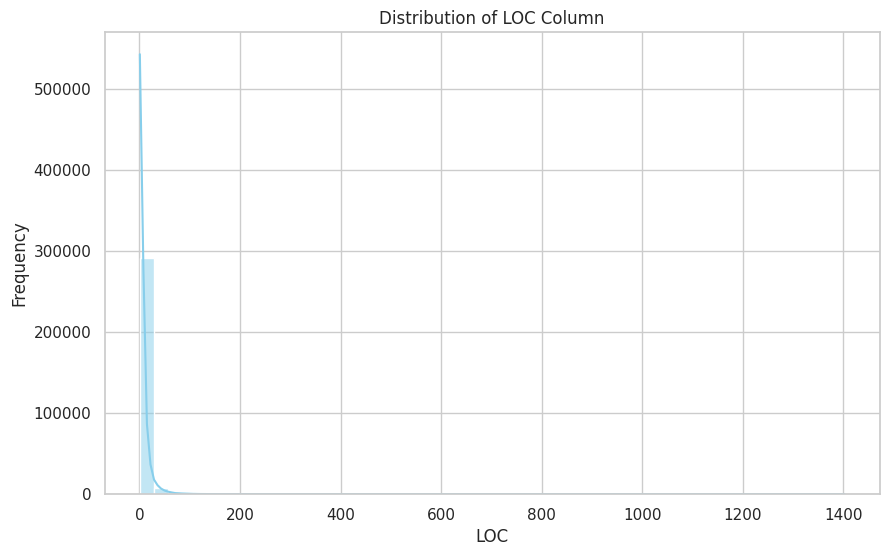

In [60]:
# Assuming your DataFrame is named 'df'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the distribution of the 'loc' column
sns.histplot(df['loc'], kde=True, color='skyblue', bins=50)

plt.title('Distribution of LOC Column')
plt.xlabel('LOC')
plt.ylabel('Frequency')
plt.show()


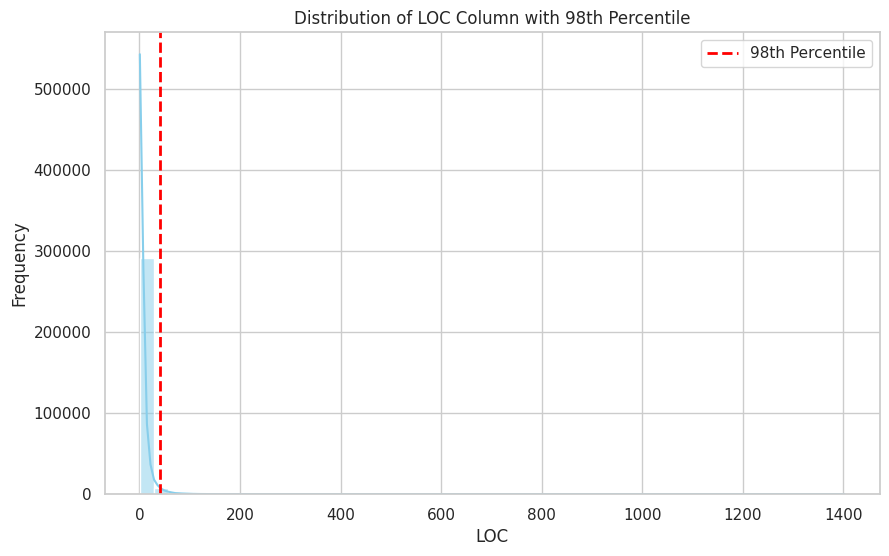

In [61]:
# Assuming your DataFrame is named 'df'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Calculate the 98th percentile of the 'loc' column
percentile_98 = df['loc'].quantile(0.98)

# Plotting the distribution of the 'loc' column
sns.histplot(df['loc'], kde=True, color='skyblue', bins=50)

# Adding a vertical line at the 98th percentile
plt.axvline(percentile_98, color='red', linestyle='dashed', linewidth=2, label='98th Percentile')

plt.title('Distribution of LOC Column with 98th Percentile')
plt.xlabel('LOC')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [62]:
# Assuming your DataFrame is named 'df'
# Calculate the 5th and 95th percentiles of the 'loc' column
loc_5th_percentile = df['loc'].quantile(0.02)
loc_95th_percentile = df['loc'].quantile(0.95)

# Filter the DataFrame based on the condition
percent_df = df[(df['loc'] >= 4) & (df['loc'] < 100)]

# Display or further manipulate the filtered DataFrame as needed
percent_df.shape

(139734, 28)

In [63]:
min(percent_df['loc']), max(percent_df['loc'])

(4, 99)

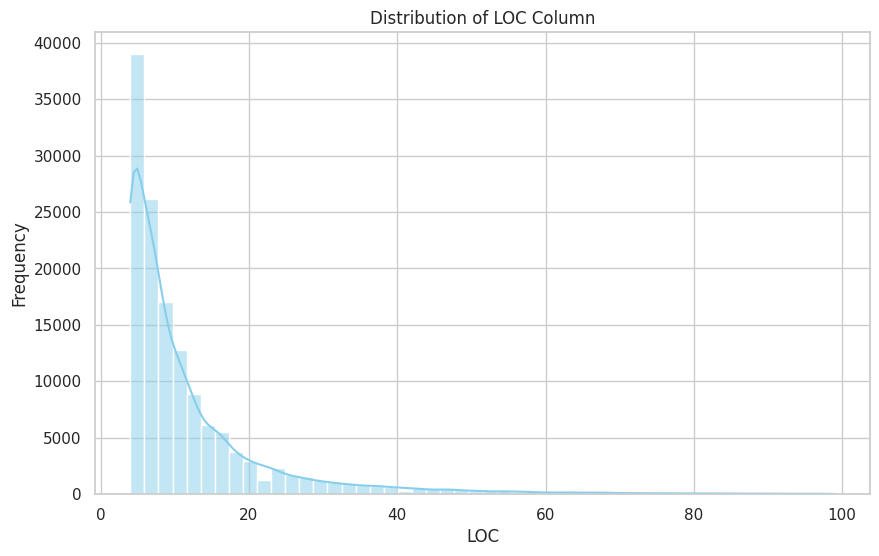

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the distribution of the 'loc' column
sns.histplot(percent_df['loc'], kde=True, color='skyblue', bins=50)

plt.title('Distribution of LOC Column')
plt.xlabel('LOC')
plt.ylabel('Frequency')
plt.show()


(139713, 28)


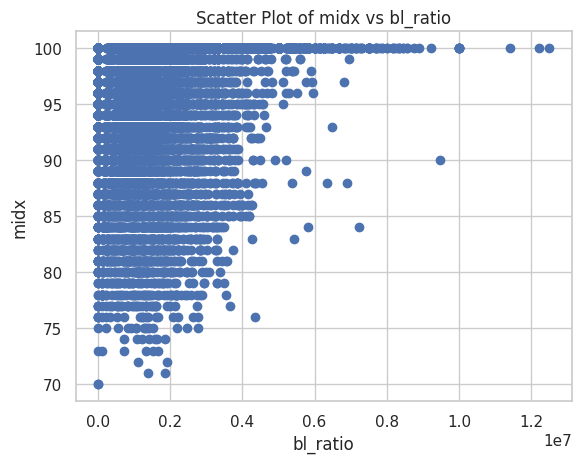

,loc,nobl,midx,cc,hse,hsd,hsv,bl_ratio
loc,1.000000,0.644057,-0.727574,0.729271,0.669934,0.666609,0.873078,0.267071
nobl,0.644057,1.000000,-0.508467,0.392446,0.495286,0.458566,0.633241,0.723741
midx,-0.727574,-0.508467,1.000000,-0.532935,-0.635881,-0.453769,-0.720485,-0.144020
cc,0.729271,0.392446,-0.532935,1.000000,0.431974,0.534904,0.552044,0.128391
hse,0.669934,0.495286,-0.635881,0.431974,1.000000,0.691451,0.846114,0.187016
hsd,0.666609,0.458566,-0.453769,0.534904,0.691451,1.000000,0.688229,0.237272
hsv,0.873078,0.633241,-0.720485,0.552044,0.846114,0.688229,1.000000,0.280297
bl_ratio,0.267071,0.723741,-0.144020,0.128391,0.187016,0.237272,0.280297,1.000000


In [65]:
plot_scatter(percent_df[(percent_df['loc']>3) & (percent_df['midx']>0)], "bl_ratio", "midx")
count_corr(percent_df[(percent_df['loc'] < 100) &(percent_df['loc'] > 3)], ["loc", "nobl", "midx", "cc", "hse", "hsd", "hsv", "bl_ratio"])

In [67]:
count_corr(percent_df, ["nobl", "nocl", "cc", "hse", "hsd", "hsv", "bl_ratio"])

,nobl,nocl,cc,hse,hsd,hsv,bl_ratio
nobl,1.000000,0.482830,0.392446,0.495286,0.458566,0.633241,0.723741
nocl,0.482830,1.000000,0.294751,0.349124,0.303475,0.426789,0.277751
cc,0.392446,0.294751,1.000000,0.431974,0.534904,0.552044,0.128391
hse,0.495286,0.349124,0.431974,1.000000,0.691451,0.846114,0.187016
hsd,0.458566,0.303475,0.534904,0.691451,1.000000,0.688229,0.237272
hsv,0.633241,0.426789,0.552044,0.846114,0.688229,1.000000,0.280297
bl_ratio,0.723741,0.277751,0.128391,0.187016,0.237272,0.280297,1.000000


In [33]:
# Table of distribution using value_counts
distribution_table = df['loc'].value_counts().reset_index()
distribution_table.columns = ['LOC', 'Frequency']
distribution_table

,LOC,Frequency
0,3,145935
1,4,26159
2,6,13673
3,5,12808
4,7,12479
...,...,...
370,228,1
371,1402,1
372,646,1
373,843,1


In [68]:
temp = df.copy()
for i in ['nobl', 'loc', 'nocl', 'hsd', 'hse', 'hsv', 'cc', 'bl_ratio', 'midx', 'cl_ratio']:
    temp = temp[temp[i].notna() & (temp[i] != '-')]
    temp.loc[:, i] = temp.loc[:, i].astype(float)

temp.head()

,repo,java_file,acoco,CAMC,CAMC-cvc,cc,coco,fout,hsd,hse,...,mncoco,mxcoco,NHD,NHD-cvc,nobl,nocl,SCOM,SCOM-cvc,bl_ratio,cl_ratio
0,NaN,/blogserver/src/main/java/org/sang/config/MyPa...,0,-,-,1.0,0,0,5.500,756.841,...,0,0,-,-,0,0,-,-,0,0
1,NaN,/blogserver/src/main/java/org/sang/config/MyPa...,0,-,-,1.0,0,0,4.571,464.362,...,0,0,-,-,0,0,-,-,0,0
2,NaN,/blogserver/src/main/java/org/sang/config/WebS...,0,-,-,1.0,0,0,14.468,26133.913,...,0,0,-,-,0,0,-,-,0,0
3,NaN,/blogserver/src/main/java/org/sang/config/WebS...,0,-,-,1.0,0,0,5.000,304.722,...,0,0,-,-,0,0,-,-,0,0
4,NaN,/blogserver/src/main/java/org/sang/config/WebS...,0,-,-,1.0,0,0,3.500,144.232,...,0,0,-,-,0,0,-,-,0,0


Mean Squared Error: 1.0502648419707068
R-squared Score: 0.8416040673555034
Top 10 Features:
    Feature  Importance
2       loc    0.927259
0  bl_ratio    0.036888
1  cl_ratio    0.035853


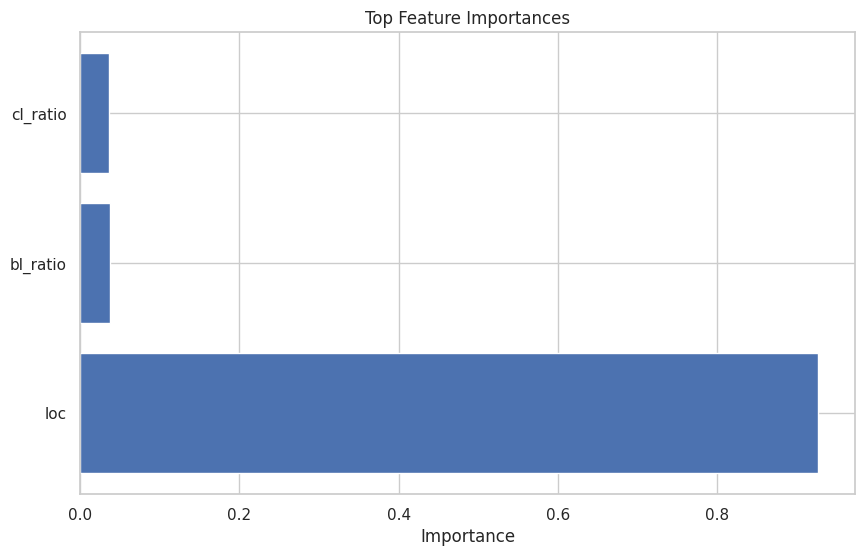

In [77]:
# Assuming you have a DataFrame named 'df' with your data
# Make sure your target variable is in a column named 'target'

# For demonstration purposes, let's assume you have numerical features
# Modify the code accordingly if you have categorical features

# Assuming 'target' is your target variable
target_column = 'midx'
df = temp.copy()
df = df[[target_column, 'bl_ratio', 'cl_ratio', 'loc']] # 'nobl', 'loc', 'nocl', 'hsd', 'hse', 'hsv', 'cc', 'midx'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features and their importances
top_n = 10  # Change this value based on your preference
print(f'Top {top_n} Features:')
print(feature_importance_df.head(top_n))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.title('Top Feature Importances')
plt.show()
